## Comparison of the quality of bins received by different binners, before and after Das-tool dereliction and decontamination. 

In [1]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import kaleido
import plotly.graph_objects as go

# bin score = complitness - contamination

### read the data

In [9]:
das = pd.read_csv('input/checkm1/V412BS.dastool.tsv', sep = '\t')
das['source'] = 'das-tool_CM1'

vamb = pd.read_csv('input/checkm1/V412BS.vamb.tsv', sep = '\t')
vamb1 = vamb[vamb['Contamination'] <= 100]
vamb['source'] = 'vamb'

maxbin = pd.read_csv('input/checkm1/V412BS.maxbin.tsv', sep = '\t')
maxbin['source'] = 'maxbin'

metabat  = pd.read_csv('input/checkm1/V412BS.metabat.tsv', sep = '\t')
metabat['source'] = 'metabat'

con = [vamb,maxbin,metabat,das]
mrg = pd.concat(con)
mrg = mrg[['Bin Id','Completeness','Contamination','source']]
mrg['Bscore'] = mrg['Completeness']-mrg['Contamination']

mrg.head(2)

,Bin Id,Completeness,Contamination,source,Bscore
0,vamb_101937,55.10,0.19,vamb,54.91
1,vamb_105502,12.07,0.00,vamb,12.07


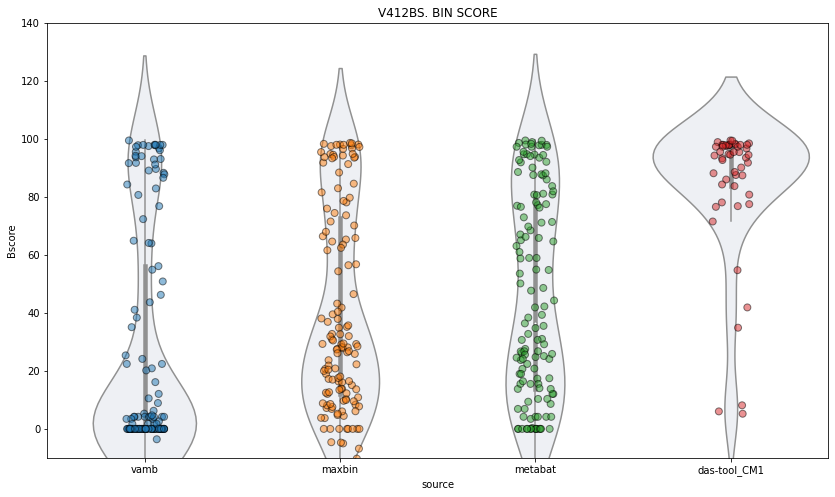

In [15]:
fig = plt.figure(figsize = (14, 8))

sns.violinplot(data=mrg, y='Bscore', x='source', color='#edf0f5').set(title='V412BS. BIN SCORE')
sns.stripplot(data=mrg, y='Bscore', x='source', alpha=0.5, s=7, edgecolor="black",
                linewidth=1)
plt.ylim(-10,140)

fig.savefig('results/Bin_score.jpg', dpi=150)

In [16]:
# Both Completeness and Contamination plot
fig = plt.figure(figsize = (14, 14))
fig = px.scatter(mrg, x="Completeness", y="Contamination",color="source",
                 size_max=60, facet_row="source",opacity=0.7,
                 width=800, height=600, title="V412BS. Bins quality")
#fig.update_yaxes(title='', visible=True, showticklabels=False)
fig.for_each_annotation(lambda a: a.update(text=''))

fig.update_layout(
    font_family="Courier New",
    title_x=0.45,
    yaxis_title="Contamination",
    legend_title="Binner program")

fig.write_image('results/Bins_qual.jpg', scale=3)
fig.show()

<Figure size 1008x1008 with 0 Axes>